## Training a Reinforcement Learning Agent for Trading

### Cleaning the Data

In [473]:
import pandas as pd
import matplotlib.pyplot as plt

In [474]:
df = pd.read_csv("fin_data.csv", index_col = "Datetime")
df

,Open,High,Low,Close,Adj Close,Volume,SMA_ratio,MACD_hist,RSI,SO_diff,returns
Datetime,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.014713,1.015744,1.013582,1.015744,1.015744,0,1.010741,-0.000011,54.977630,16.843137,0.000914
2022-09-13 09:00:00+00:00,1.015022,1.016880,1.014713,1.016880,1.016880,0,1.010875,0.000113,66.968203,7.167459,0.001119
2022-09-13 10:00:00+00:00,1.016984,1.018226,1.016363,1.018226,1.018226,0,1.010958,0.000261,68.519030,0.000000,0.001324
2022-09-13 11:00:00+00:00,1.018019,1.018849,1.017812,1.018019,1.018019,0,1.011022,0.000316,69.576672,-8.512356,-0.000204
2022-09-13 12:00:00+00:00,1.018123,1.018226,1.003814,1.004016,1.004016,0,1.010920,-0.000571,28.876104,-61.516603,-0.013755
...,...,...,...,...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082720,1.082837,1.082251,1.082485,1.082485,0,0.997683,-0.000161,32.924687,-1.561545,-0.000325
2024-07-29 19:00:00+00:00,1.082603,1.082837,1.082603,1.082603,1.082603,0,0.997667,-0.000100,34.565767,-0.206691,0.000108
2024-07-29 20:00:00+00:00,1.082603,1.082603,1.082251,1.082368,1.082368,0,0.997655,-0.000064,23.563915,-0.508117,-0.000216


In [475]:
df.index = pd.to_datetime(df.index)

In [476]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11619 entries, 2022-09-13 08:00:00+00:00 to 2024-07-29 22:00:00+00:00
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       11619 non-null  float64
 1   High       11619 non-null  float64
 2   Low        11619 non-null  float64
 3   Close      11619 non-null  float64
 4   Adj Close  11619 non-null  float64
 5   Volume     11619 non-null  int64  
 6   SMA_ratio  11619 non-null  float64
 7   MACD_hist  11619 non-null  float64
 8   RSI        11619 non-null  float64
 9   SO_diff    11619 non-null  float64
 10  returns    11619 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.1 MB


In [477]:
df = df.drop(columns = ["Open", "High", "Low", "Adj Close", "Volume"])
df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns
Datetime,,,,,,
2022-09-13 08:00:00+00:00,1.015744,1.010741,-0.000011,54.977630,16.843137,0.000914
2022-09-13 09:00:00+00:00,1.016880,1.010875,0.000113,66.968203,7.167459,0.001119
2022-09-13 10:00:00+00:00,1.018226,1.010958,0.000261,68.519030,0.000000,0.001324
2022-09-13 11:00:00+00:00,1.018019,1.011022,0.000316,69.576672,-8.512356,-0.000204
2022-09-13 12:00:00+00:00,1.004016,1.010920,-0.000571,28.876104,-61.516603,-0.013755
...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082485,0.997683,-0.000161,32.924687,-1.561545,-0.000325
2024-07-29 19:00:00+00:00,1.082603,0.997667,-0.000100,34.565767,-0.206691,0.000108
2024-07-29 20:00:00+00:00,1.082368,0.997655,-0.000064,23.563915,-0.508117,-0.000216


### Splitting into Training Set and Testing Set

In [478]:
train_size = 10000 # rule of thumb: 80% training, 20% testing

In [479]:
train_df = df.iloc[:train_size].copy() # no random shuffling!
train_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns
Datetime,,,,,,
2022-09-13 08:00:00+00:00,1.015744,1.010741,-0.000011,54.977630,16.843137,0.000914
2022-09-13 09:00:00+00:00,1.016880,1.010875,0.000113,66.968203,7.167459,0.001119
2022-09-13 10:00:00+00:00,1.018226,1.010958,0.000261,68.519030,0.000000,0.001324
2022-09-13 11:00:00+00:00,1.018019,1.011022,0.000316,69.576672,-8.512356,-0.000204
2022-09-13 12:00:00+00:00,1.004016,1.010920,-0.000571,28.876104,-61.516603,-0.013755
...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,1.069862,1.002500,-0.000141,44.823189,16.159132,0.000428
2024-04-24 18:00:00+00:00,1.069633,1.002575,-0.000109,43.329109,4.502280,-0.000214
2024-04-24 19:00:00+00:00,1.070320,1.002638,-0.000041,48.482553,16.219202,0.000642


In [480]:
test_df = df.iloc[train_size:].copy() # test set shoould be most recent data!
test_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns
Datetime,,,,,,
2024-04-24 22:00:00+00:00,1.069976,1.002807,0.000006,40.304151,-4.171371,-0.000107
2024-04-24 23:00:00+00:00,1.070205,1.002865,0.000017,44.990535,4.169923,0.000214
2024-04-25 00:00:00+00:00,1.070549,1.002922,0.000043,48.384115,11.128962,0.000321
2024-04-25 01:00:00+00:00,1.071008,1.002994,0.000084,53.976681,9.955629,0.000428
2024-04-25 02:00:00+00:00,1.071008,1.003056,0.000103,60.729039,0.113967,0.000000
...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082485,0.997683,-0.000161,32.924687,-1.561545,-0.000325
2024-07-29 19:00:00+00:00,1.082603,0.997667,-0.000100,34.565767,-0.206691,0.000108
2024-07-29 20:00:00+00:00,1.082368,0.997655,-0.000064,23.563915,-0.508117,-0.000216


In [481]:
test_df.max()

Close         1.094691
SMA_ratio     1.006535
MACD_hist     0.001267
RSI          91.187101
SO_diff      48.809575
returns       0.005958
dtype: float64

### Discretization with Quantile Binning: example

In [482]:
train_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns
Datetime,,,,,,
2022-09-13 08:00:00+00:00,1.015744,1.010741,-0.000011,54.977630,16.843137,0.000914
2022-09-13 09:00:00+00:00,1.016880,1.010875,0.000113,66.968203,7.167459,0.001119
2022-09-13 10:00:00+00:00,1.018226,1.010958,0.000261,68.519030,0.000000,0.001324
2022-09-13 11:00:00+00:00,1.018019,1.011022,0.000316,69.576672,-8.512356,-0.000204
2022-09-13 12:00:00+00:00,1.004016,1.010920,-0.000571,28.876104,-61.516603,-0.013755
...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,1.069862,1.002500,-0.000141,44.823189,16.159132,0.000428
2024-04-24 18:00:00+00:00,1.069633,1.002575,-0.000109,43.329109,4.502280,-0.000214
2024-04-24 19:00:00+00:00,1.070320,1.002638,-0.000041,48.482553,16.219202,0.000642


Remember: 
- For Q-Learning we need to __discretize continuous Features__
- There is a __trade-off__ between granularity and computational requirements
- the Q-Table contains all state-action pairs and should __not be too large__!

__Observation Space__

- SMA_ratio (bins?)
- MACD_hist (bins?)
- RSI (bins?)
- So_diff (bins?)
- returns (bins?)

- current trading position (short, neutral, long)

In [483]:
num_bins = 6

In [484]:
states = num_bins**5 * 3 # total number of states
states

23328

__Action Space__ (simple)

- go/stay short, neutral, long (3)

__State-Action Pairs__

In [485]:
states * 3

69984

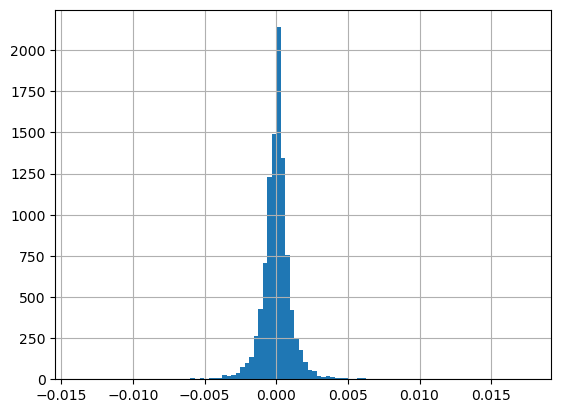

In [486]:
train_df.returns.hist(bins = 100)
plt.show()

In [487]:
num_bins

6

In [488]:
# Use qcut with retbins=True to get the bin edges
train_df['returns_binned'], bin_edges = pd.qcut(train_df['returns'], q = num_bins, labels=False, retbins=True, duplicates='drop')
train_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns,returns_binned
Datetime,,,,,,,
2022-09-13 08:00:00+00:00,1.015744,1.010741,-0.000011,54.977630,16.843137,0.000914,5
2022-09-13 09:00:00+00:00,1.016880,1.010875,0.000113,66.968203,7.167459,0.001119,5
2022-09-13 10:00:00+00:00,1.018226,1.010958,0.000261,68.519030,0.000000,0.001324,5
2022-09-13 11:00:00+00:00,1.018019,1.011022,0.000316,69.576672,-8.512356,-0.000204,2
2022-09-13 12:00:00+00:00,1.004016,1.010920,-0.000571,28.876104,-61.516603,-0.013755,0
...,...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,1.069862,1.002500,-0.000141,44.823189,16.159132,0.000428,4
2024-04-24 18:00:00+00:00,1.069633,1.002575,-0.000109,43.329109,4.502280,-0.000214,2
2024-04-24 19:00:00+00:00,1.070320,1.002638,-0.000041,48.482553,16.219202,0.000642,4


In [489]:
train_df.returns_binned.value_counts().sort_index()

returns_binned
0    1667
1    1666
2    2013
3    1320
4    1668
5    1666
Name: count, dtype: int64

In [490]:
bin_edges

array([-0.0138544 , -0.00066096, -0.00021933,  0.        ,  0.00022115,
        0.00066335,  0.01762023])

### Discretization and Binning of Testset

Idea: Using the same bin edges for the Test Set. Otherwise (if we use training and testing data to determine bin_edges) Data Leakage would be present (using unknown future test set data in the training phase) leading to a biased testing performance.

In [491]:
import numpy as np

In [492]:
test_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns
Datetime,,,,,,
2024-04-24 22:00:00+00:00,1.069976,1.002807,0.000006,40.304151,-4.171371,-0.000107
2024-04-24 23:00:00+00:00,1.070205,1.002865,0.000017,44.990535,4.169923,0.000214
2024-04-25 00:00:00+00:00,1.070549,1.002922,0.000043,48.384115,11.128962,0.000321
2024-04-25 01:00:00+00:00,1.071008,1.002994,0.000084,53.976681,9.955629,0.000428
2024-04-25 02:00:00+00:00,1.071008,1.003056,0.000103,60.729039,0.113967,0.000000
...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082485,0.997683,-0.000161,32.924687,-1.561545,-0.000325
2024-07-29 19:00:00+00:00,1.082603,0.997667,-0.000100,34.565767,-0.206691,0.000108
2024-07-29 20:00:00+00:00,1.082368,0.997655,-0.000064,23.563915,-0.508117,-0.000216


In [493]:
# Discretizing test set based on the bin_edges from train set
test_df['returns_binned'] = pd.cut(test_df['returns'], bins = np.concatenate(([-np.inf], bin_edges[1:-1], [np.inf])), labels=False)

In [494]:
test_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns,returns_binned
Datetime,,,,,,,
2024-04-24 22:00:00+00:00,1.069976,1.002807,0.000006,40.304151,-4.171371,-0.000107,2
2024-04-24 23:00:00+00:00,1.070205,1.002865,0.000017,44.990535,4.169923,0.000214,3
2024-04-25 00:00:00+00:00,1.070549,1.002922,0.000043,48.384115,11.128962,0.000321,4
2024-04-25 01:00:00+00:00,1.071008,1.002994,0.000084,53.976681,9.955629,0.000428,4
2024-04-25 02:00:00+00:00,1.071008,1.003056,0.000103,60.729039,0.113967,0.000000,2
...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082485,0.997683,-0.000161,32.924687,-1.561545,-0.000325,1
2024-07-29 19:00:00+00:00,1.082603,0.997667,-0.000100,34.565767,-0.206691,0.000108,3
2024-07-29 20:00:00+00:00,1.082368,0.997655,-0.000064,23.563915,-0.508117,-0.000216,2


In [495]:
test_df.returns_binned.value_counts().sort_index()

returns_binned
0    131
1    282
2    499
3    294
4    265
5    148
Name: count, dtype: int64

### Discretization (bringing it all together)

__Train Set__

In [496]:
train_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns,returns_binned
Datetime,,,,,,,
2022-09-13 08:00:00+00:00,1.015744,1.010741,-0.000011,54.977630,16.843137,0.000914,5
2022-09-13 09:00:00+00:00,1.016880,1.010875,0.000113,66.968203,7.167459,0.001119,5
2022-09-13 10:00:00+00:00,1.018226,1.010958,0.000261,68.519030,0.000000,0.001324,5
2022-09-13 11:00:00+00:00,1.018019,1.011022,0.000316,69.576672,-8.512356,-0.000204,2
2022-09-13 12:00:00+00:00,1.004016,1.010920,-0.000571,28.876104,-61.516603,-0.013755,0
...,...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,1.069862,1.002500,-0.000141,44.823189,16.159132,0.000428,4
2024-04-24 18:00:00+00:00,1.069633,1.002575,-0.000109,43.329109,4.502280,-0.000214,2
2024-04-24 19:00:00+00:00,1.070320,1.002638,-0.000041,48.482553,16.219202,0.000642,4


In [497]:
bin_edges_list = []

In [498]:
features = ["SMA_ratio", "MACD_hist", "RSI", "SO_diff", "returns"]
features

['SMA_ratio', 'MACD_hist', 'RSI', 'SO_diff', 'returns']

In [499]:
num_bins = 6

In [500]:
for feature in features:
    train_df[f'{feature}_binned'], bin_edges = pd.qcut(train_df[f'{feature}'], q = num_bins, labels=False, retbins=True, duplicates='drop')
    bin_edges_list.append(bin_edges)

In [501]:
train_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned
Datetime,,,,,,,,,,,
2022-09-13 08:00:00+00:00,1.015744,1.010741,-0.000011,54.977630,16.843137,0.000914,5,5,2,3,5
2022-09-13 09:00:00+00:00,1.016880,1.010875,0.000113,66.968203,7.167459,0.001119,5,5,3,5,4
2022-09-13 10:00:00+00:00,1.018226,1.010958,0.000261,68.519030,0.000000,0.001324,5,5,4,5,2
2022-09-13 11:00:00+00:00,1.018019,1.011022,0.000316,69.576672,-8.512356,-0.000204,2,5,5,5,1
2022-09-13 12:00:00+00:00,1.004016,1.010920,-0.000571,28.876104,-61.516603,-0.013755,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,1.069862,1.002500,-0.000141,44.823189,16.159132,0.000428,4,3,1,2,5
2024-04-24 18:00:00+00:00,1.069633,1.002575,-0.000109,43.329109,4.502280,-0.000214,2,3,2,1,4
2024-04-24 19:00:00+00:00,1.070320,1.002638,-0.000041,48.482553,16.219202,0.000642,4,3,2,2,5


In [502]:
bin_edges_list

[array([0.97741473, 0.99528851, 0.99774247, 1.00003993, 1.00269399,
        1.00557236, 1.02659393]),
 array([-2.33231278e-03, -3.13387818e-04, -1.16764215e-04,  8.40353178e-06,
         1.33821818e-04,  3.08266517e-04,  2.28905596e-03]),
 array([ 6.97063298, 34.66469043, 43.4433011 , 50.58890615, 57.28730067,
        65.72159634, 95.20558186]),
 array([-6.15166027e+01, -1.00407159e+01, -3.50232813e+00,  2.15310919e-02,
         3.70885460e+00,  9.93513245e+00,  5.83616149e+01]),
 array([-0.0138544 , -0.00066096, -0.00021933,  0.        ,  0.00022115,
         0.00066335,  0.01762023])]

In [503]:
features

['SMA_ratio', 'MACD_hist', 'RSI', 'SO_diff', 'returns']

In [504]:
train_df.RSI_binned.value_counts().sort_index()

RSI_binned
0    1667
1    1666
2    1667
3    1666
4    1667
5    1667
Name: count, dtype: int64

In [505]:
train_df = train_df.drop(columns = ["SMA_ratio", "MACD_hist", "RSI", "SO_diff", "returns"])
train_df

,Close,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned
Datetime,,,,,,
2022-09-13 08:00:00+00:00,1.015744,5,5,2,3,5
2022-09-13 09:00:00+00:00,1.016880,5,5,3,5,4
2022-09-13 10:00:00+00:00,1.018226,5,5,4,5,2
2022-09-13 11:00:00+00:00,1.018019,2,5,5,5,1
2022-09-13 12:00:00+00:00,1.004016,0,5,0,0,0
...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,1.069862,4,3,1,2,5
2024-04-24 18:00:00+00:00,1.069633,2,3,2,1,4
2024-04-24 19:00:00+00:00,1.070320,4,3,2,2,5


__Test Set__

In [506]:
test_df

,Close,SMA_ratio,MACD_hist,RSI,SO_diff,returns,returns_binned
Datetime,,,,,,,
2024-04-24 22:00:00+00:00,1.069976,1.002807,0.000006,40.304151,-4.171371,-0.000107,2
2024-04-24 23:00:00+00:00,1.070205,1.002865,0.000017,44.990535,4.169923,0.000214,3
2024-04-25 00:00:00+00:00,1.070549,1.002922,0.000043,48.384115,11.128962,0.000321,4
2024-04-25 01:00:00+00:00,1.071008,1.002994,0.000084,53.976681,9.955629,0.000428,4
2024-04-25 02:00:00+00:00,1.071008,1.003056,0.000103,60.729039,0.113967,0.000000,2
...,...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082485,0.997683,-0.000161,32.924687,-1.561545,-0.000325,1
2024-07-29 19:00:00+00:00,1.082603,0.997667,-0.000100,34.565767,-0.206691,0.000108,3
2024-07-29 20:00:00+00:00,1.082368,0.997655,-0.000064,23.563915,-0.508117,-0.000216,2


In [507]:
bin_edges_list

[array([0.97741473, 0.99528851, 0.99774247, 1.00003993, 1.00269399,
        1.00557236, 1.02659393]),
 array([-2.33231278e-03, -3.13387818e-04, -1.16764215e-04,  8.40353178e-06,
         1.33821818e-04,  3.08266517e-04,  2.28905596e-03]),
 array([ 6.97063298, 34.66469043, 43.4433011 , 50.58890615, 57.28730067,
        65.72159634, 95.20558186]),
 array([-6.15166027e+01, -1.00407159e+01, -3.50232813e+00,  2.15310919e-02,
         3.70885460e+00,  9.93513245e+00,  5.83616149e+01]),
 array([-0.0138544 , -0.00066096, -0.00021933,  0.        ,  0.00022115,
         0.00066335,  0.01762023])]

In [508]:
i = 0
for feature in features:
    test_df[f'{feature}_binned'] = pd.cut(test_df[f'{feature}'], bins = np.concatenate(([-np.inf], bin_edges_list[i][1:-1], [np.inf])), labels=False)
    i +=1

In [509]:
test_df = test_df.drop(columns = ["SMA_ratio", "MACD_hist", "RSI", "SO_diff", "returns"])
test_df

,Close,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned
Datetime,,,,,,
2024-04-24 22:00:00+00:00,1.069976,2,4,2,1,1
2024-04-24 23:00:00+00:00,1.070205,3,4,3,2,4
2024-04-25 00:00:00+00:00,1.070549,4,4,3,2,5
2024-04-25 01:00:00+00:00,1.071008,4,4,3,3,5
2024-04-25 02:00:00+00:00,1.071008,2,4,3,4,3
...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1.082485,1,1,1,0,2
2024-07-29 19:00:00+00:00,1.082603,3,1,2,0,2
2024-07-29 20:00:00+00:00,1.082368,2,1,2,0,2


In [510]:
test_df.returns_binned.value_counts().sort_index()

returns_binned
0    131
1    282
2    499
3    294
4    265
5    148
Name: count, dtype: int64

In [511]:
test_df.SMA_ratio_binned.value_counts().sort_index()

SMA_ratio_binned
0    101
1    163
2    374
3    448
4    443
5     90
Name: count, dtype: int64

In [512]:
test_df.MACD_hist_binned.value_counts().sort_index()

MACD_hist_binned
0    118
1    357
2    395
3    386
4    209
5    154
Name: count, dtype: int64

In [513]:
test_df.RSI_binned.value_counts().sort_index()

RSI_binned
0    259
1    242
2    228
3    296
4    291
5    303
Name: count, dtype: int64

In [514]:
test_df.SO_diff_binned.value_counts().sort_index()

SO_diff_binned
0    276
1    280
2    280
3    253
4    261
5    269
Name: count, dtype: int64

### Calculating Trading Profits / Rewards

In [515]:
train_df

,Close,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned
Datetime,,,,,,
2022-09-13 08:00:00+00:00,1.015744,5,5,2,3,5
2022-09-13 09:00:00+00:00,1.016880,5,5,3,5,4
2022-09-13 10:00:00+00:00,1.018226,5,5,4,5,2
2022-09-13 11:00:00+00:00,1.018019,2,5,5,5,1
2022-09-13 12:00:00+00:00,1.004016,0,5,0,0,0
...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,1.069862,4,3,1,2,5
2024-04-24 18:00:00+00:00,1.069633,2,3,2,1,4
2024-04-24 19:00:00+00:00,1.070320,4,3,2,2,5


- Trading Profits will depend on the contract size (number of derivative contracts) / trading volume
- Assumption: All Trades are based on 1,000 EUR/USD contracts ("buying/selling 1,000 EUR")

In [516]:
units = 1000

In [517]:
train_df["Profit"] = train_df.Close.diff() * units
train_df[["Close", "Profit"]]

,Close,Profit
Datetime,,
2022-09-13 08:00:00+00:00,1.015744,NaN
2022-09-13 09:00:00+00:00,1.016880,1.136184
2022-09-13 10:00:00+00:00,1.018226,1.345992
2022-09-13 11:00:00+00:00,1.018019,-0.207305
2022-09-13 12:00:00+00:00,1.004016,-14.002919
...,...,...
2024-04-24 17:00:00+00:00,1.069862,0.457644
2024-04-24 18:00:00+00:00,1.069633,-0.228882
2024-04-24 19:00:00+00:00,1.070320,0.686884


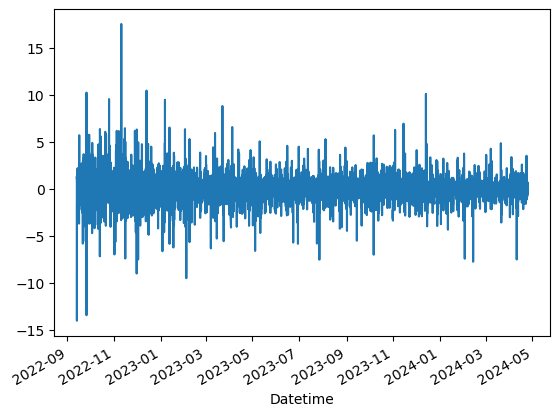

In [518]:
train_df.Profit.plot()
plt.show()

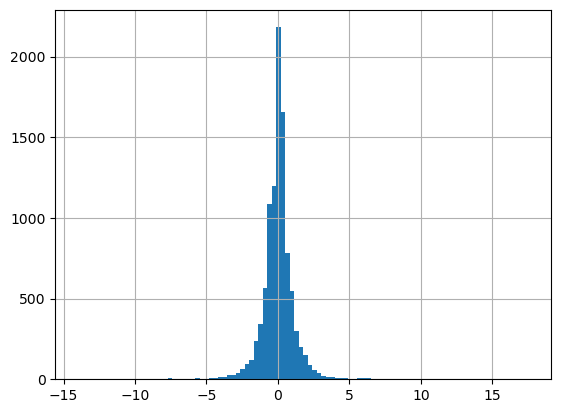

In [519]:
train_df.Profit.hist(bins = 100)
plt.show()

In [520]:
train_df = train_df.drop(columns = ["Close"])
train_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
Datetime,,,,,,
2022-09-13 08:00:00+00:00,5,5,2,3,5,NaN
2022-09-13 09:00:00+00:00,5,5,3,5,4,1.136184
2022-09-13 10:00:00+00:00,5,5,4,5,2,1.345992
2022-09-13 11:00:00+00:00,2,5,5,5,1,-0.207305
2022-09-13 12:00:00+00:00,0,5,0,0,0,-14.002919
...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,4,3,1,2,5,0.457644
2024-04-24 18:00:00+00:00,2,3,2,1,4,-0.228882
2024-04-24 19:00:00+00:00,4,3,2,2,5,0.686884


In [521]:
train_df = train_df.dropna()
train_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
Datetime,,,,,,
2022-09-13 09:00:00+00:00,5,5,3,5,4,1.136184
2022-09-13 10:00:00+00:00,5,5,4,5,2,1.345992
2022-09-13 11:00:00+00:00,2,5,5,5,1,-0.207305
2022-09-13 12:00:00+00:00,0,5,0,0,0,-14.002919
2022-09-13 13:00:00+00:00,1,5,0,0,0,-0.503778
...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,4,3,1,2,5,0.457644
2024-04-24 18:00:00+00:00,2,3,2,1,4,-0.228882
2024-04-24 19:00:00+00:00,4,3,2,2,5,0.686884


In [522]:
test_df["Profit"] = test_df.Close.diff() * units

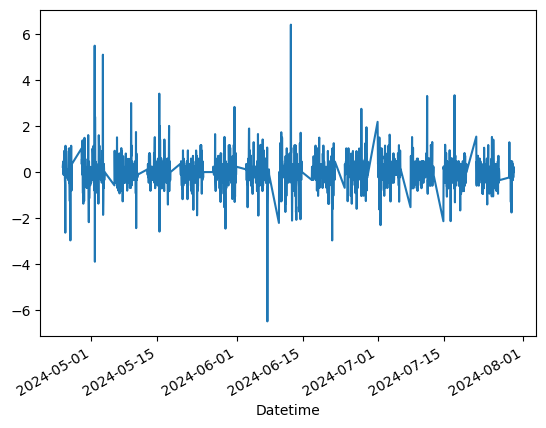

In [523]:
test_df.Profit.plot()
plt.show()

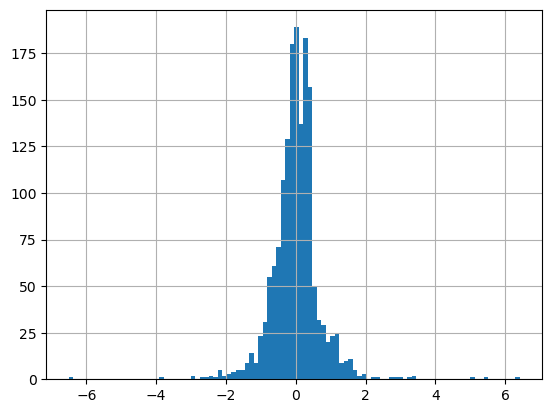

In [524]:
test_df.Profit.hist(bins = 100)
plt.show()

In [525]:
test_df = test_df.drop(columns = ["Close"]).dropna()
test_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
Datetime,,,,,,
2024-04-24 23:00:00+00:00,3,4,3,2,4,0.229001
2024-04-25 00:00:00+00:00,4,4,3,2,5,0.343800
2024-04-25 01:00:00+00:00,4,4,3,3,5,0.458598
2024-04-25 02:00:00+00:00,2,4,3,4,3,0.000000
2024-04-25 03:00:00+00:00,2,4,3,4,1,-0.114679
...,...,...,...,...,...,...
2024-07-29 18:00:00+00:00,1,1,1,0,2,-0.351548
2024-07-29 19:00:00+00:00,3,1,2,0,2,0.117183
2024-07-29 20:00:00+00:00,2,1,2,0,2,-0.234365


### Training an RL Agent with Q-Tables (one Episode)

In [526]:
train_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
Datetime,,,,,,
2022-09-13 09:00:00+00:00,5,5,3,5,4,1.136184
2022-09-13 10:00:00+00:00,5,5,4,5,2,1.345992
2022-09-13 11:00:00+00:00,2,5,5,5,1,-0.207305
2022-09-13 12:00:00+00:00,0,5,0,0,0,-14.002919
2022-09-13 13:00:00+00:00,1,5,0,0,0,-0.503778
...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,4,3,1,2,5,0.457644
2024-04-24 18:00:00+00:00,2,3,2,1,4,-0.228882
2024-04-24 19:00:00+00:00,4,3,2,2,5,0.686884


In [527]:
import numpy as np
import pandas as pd

In [528]:
# Function to get the current state for a row
def get_state(row):
    return (int(row['returns_binned']),
            int(row['SMA_ratio_binned']),
            int(row['MACD_hist_binned']),
            int(row['RSI_binned']),
            int(row['SO_diff_binned']),
            int(row['position']))

In [529]:
# Define the reward function based on position and Profit
def calculate_reward(position, Profit):
    if position == 2:  # Long
        return Profit  # Reward as is (positive for positive returns)
    elif position == 0:  # Short
        return -Profit  # Inverse the reward (positive for negative returns)
    else:  # Neutral
        return 0  # No reward (could be modified based on strategy)

In [530]:
# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.5  # Exploration rate

num_bins = (11, 11, 11, 11, 11, 3, 3) # incl. Action Space 

# Initialize the Q-table with dimensions (11, 11, 11, 11, 11, 3, 3)
q_table = np.random.uniform(low = -1, high = 1, size = num_bins)

total_reward = 0
start_index = 0

# Select the sequence of all timestamps
data = train_df.iloc[start_index:].copy()
data['position'] = 1 # initialize positions (neutral)

row = data.iloc[0] # first step (bar) in episode

state = get_state(row) # state: starting with a neutral position and current indicators

for step in range(len(train_df) - 1):
    # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(3)
        else:
            action = np.argmax(q_table[state])
            
        # Determine the next position based on the action taken
        next_position = action  # The action directly translates to the new position
        
        # Update the position for the next row
        data.at[data.index[step + 1], 'position'] = next_position
        
        # Get next row
        next_row = data.iloc[step + 1]
        
        # Calculate the reward based on the current position and the row's reward
        reward = calculate_reward(next_row['position'], next_row['Profit'])
        
        # Determine the next state (after taking the action) 
        next_state = get_state(next_row)
        
        # Update Q-value
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        q_table[state][action] += alpha * (td_target - q_table[state][action])
        
         # Update the total reward and state
        total_reward += reward
        state = next_state

In [531]:
total_reward

-143.5751318931774

In [532]:
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
Datetime,,,,,,,
2022-09-13 09:00:00+00:00,5,5,3,5,4,1.136184,1
2022-09-13 10:00:00+00:00,5,5,4,5,2,1.345992,1
2022-09-13 11:00:00+00:00,2,5,5,5,1,-0.207305,1
2022-09-13 12:00:00+00:00,0,5,0,0,0,-14.002919,2
2022-09-13 13:00:00+00:00,1,5,0,0,0,-0.503778,1
...,...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,4,3,1,2,5,0.457644,2
2024-04-24 18:00:00+00:00,2,3,2,1,4,-0.228882,0
2024-04-24 19:00:00+00:00,4,3,2,2,5,0.686884,2


In [533]:
data.position = data.position.map({0: -1, 1:0, 2:1})
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
Datetime,,,,,,,
2022-09-13 09:00:00+00:00,5,5,3,5,4,1.136184,0
2022-09-13 10:00:00+00:00,5,5,4,5,2,1.345992,0
2022-09-13 11:00:00+00:00,2,5,5,5,1,-0.207305,0
2022-09-13 12:00:00+00:00,0,5,0,0,0,-14.002919,1
2022-09-13 13:00:00+00:00,1,5,0,0,0,-0.503778,0
...,...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,4,3,1,2,5,0.457644,1
2024-04-24 18:00:00+00:00,2,3,2,1,4,-0.228882,-1
2024-04-24 19:00:00+00:00,4,3,2,2,5,0.686884,1


In [534]:
(data.position * data.Profit).sum()

-143.57513189317697

In [535]:
data.position.value_counts()

position
 0    3403
-1    3353
 1    3243
Name: count, dtype: int64

__Explanation step-by-step__

In [536]:
# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 0.5  # Exploration rate

In [537]:
num_bins = (11, 11, 11, 11, 11, 3, 3) # incl. Action Space 
num_bins

(11, 11, 11, 11, 11, 3, 3)

In [538]:
# Initialize the Q-table with dimensions (11, 11, 11, 11, 11, 3, 3)
q_table = np.random.uniform(low = -1, high = 1, size = num_bins)
q_table.flatten().shape

(1449459,)

In [539]:
print(q_table.min(), q_table.max())

-0.9999996019265602 0.9999997128179205


In [540]:
# Function to get the current state for a row
def get_state(row):
    return (int(row['returns_binned']),
            int(row['SMA_ratio_binned']),
            int(row['MACD_hist_binned']),
            int(row['RSI_binned']),
            int(row['SO_diff_binned']),
            int(row['position']))

In [541]:
# Define the reward function based on position and Profit
def calculate_reward(position, Profit):
    if position == 2:  # Long
        return Profit  # Reward as is (positive for positive returns)
    elif position == 0:  # Short
        return -Profit  # Inverse the reward (positive for negative returns)
    else:  # Neutral
        return 0  # No reward (could be modified based on strategy)

In [542]:
train_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
Datetime,,,,,,
2022-09-13 09:00:00+00:00,5,5,3,5,4,1.136184
2022-09-13 10:00:00+00:00,5,5,4,5,2,1.345992
2022-09-13 11:00:00+00:00,2,5,5,5,1,-0.207305
2022-09-13 12:00:00+00:00,0,5,0,0,0,-14.002919
2022-09-13 13:00:00+00:00,1,5,0,0,0,-0.503778
...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,4,3,1,2,5,0.457644
2024-04-24 18:00:00+00:00,2,3,2,1,4,-0.228882
2024-04-24 19:00:00+00:00,4,3,2,2,5,0.686884


In [543]:
total_reward = 0

In [544]:
start_index = 0

In [545]:
# Select the sequence of all timestamps
data = train_df.iloc[start_index:].copy()
data['position'] = 1 # initialize positions (neutral)
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
Datetime,,,,,,,
2022-09-13 09:00:00+00:00,5,5,3,5,4,1.136184,1
2022-09-13 10:00:00+00:00,5,5,4,5,2,1.345992,1
2022-09-13 11:00:00+00:00,2,5,5,5,1,-0.207305,1
2022-09-13 12:00:00+00:00,0,5,0,0,0,-14.002919,1
2022-09-13 13:00:00+00:00,1,5,0,0,0,-0.503778,1
...,...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,4,3,1,2,5,0.457644,1
2024-04-24 18:00:00+00:00,2,3,2,1,4,-0.228882,1
2024-04-24 19:00:00+00:00,4,3,2,2,5,0.686884,1


In [546]:
row = data.iloc[0] # first step (bar) in episode 
row

returns_binned      5.000000
SMA_ratio_binned    5.000000
MACD_hist_binned    3.000000
RSI_binned          5.000000
SO_diff_binned      4.000000
Profit              1.136184
position            1.000000
Name: 2022-09-13 09:00:00+00:00, dtype: float64

In [547]:
state = get_state(row) # state: starting with a neutral position and current indicators
state

(5, 5, 3, 5, 4, 1)

In [548]:
epsilon

0.5

In [549]:
if np.random.rand() < epsilon:
    action = np.random.choice(3)
else:
    action = np.argmax(q_table[state])
action

1

In [550]:
q_table[state]

array([-0.4472566 ,  0.58312948, -0.10868565])

In [551]:
np.argmax(q_table[state])

1

In [552]:
# Determine the next position based on the action taken
next_position = action  # The action directly translates to the new position
next_position

1

In [553]:
step = 0

In [554]:
# Update the position for the next row
data.at[data.index[step + 1], 'position'] = next_position
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
Datetime,,,,,,,
2022-09-13 09:00:00+00:00,5,5,3,5,4,1.136184,1
2022-09-13 10:00:00+00:00,5,5,4,5,2,1.345992,1
2022-09-13 11:00:00+00:00,2,5,5,5,1,-0.207305,1
2022-09-13 12:00:00+00:00,0,5,0,0,0,-14.002919,1
2022-09-13 13:00:00+00:00,1,5,0,0,0,-0.503778,1
...,...,...,...,...,...,...,...
2024-04-24 17:00:00+00:00,4,3,1,2,5,0.457644,1
2024-04-24 18:00:00+00:00,2,3,2,1,4,-0.228882,1
2024-04-24 19:00:00+00:00,4,3,2,2,5,0.686884,1


In [555]:
 # Get next row
next_row = data.iloc[step + 1]
next_row

returns_binned      5.000000
SMA_ratio_binned    5.000000
MACD_hist_binned    4.000000
RSI_binned          5.000000
SO_diff_binned      2.000000
Profit              1.345992
position            1.000000
Name: 2022-09-13 10:00:00+00:00, dtype: float64

In [556]:
# Determine the next state (after taking the action) 
next_state = get_state(next_row)
next_state

(5, 5, 4, 5, 2, 1)

In [557]:
# Calculate the reward based on the current position and the row's reward
reward = calculate_reward(next_row['position'], next_row['Profit'])
reward

0

In [558]:
q_table[state]

array([-0.4472566 ,  0.58312948, -0.10868565])

In [559]:
# Update Q-value
best_next_action = np.argmax(q_table[next_state])
td_target = reward + gamma * q_table[next_state][best_next_action]
q_table[state][action] += alpha * (td_target - q_table[state][action])

In [560]:
q_table[state]

array([-0.4472566 ,  0.50216635, -0.10868565])

In [561]:
# Update the total reward and state
total_reward += reward
state = next_state

total_reward, state

(0, (5, 5, 4, 5, 2, 1))

In [562]:
train_df.to_csv("train_df6.csv", index = False)

In [563]:
test_df.to_csv("test_df6.csv", index = False)

### Training an RL Agent with Q-Tables (multiple Episodes)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("train_df.csv")
train_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
0,10,10,7,9,8,1.136184
1,10,10,8,9,5,1.345992
2,4,10,9,9,2,-0.207305
3,0,10,0,0,0,-14.002919
4,2,10,0,1,0,-0.503778
...,...,...,...,...,...,...
9994,8,7,3,4,10,0.457644
9995,4,7,3,3,7,-0.228882
9996,8,7,4,4,10,0.686884
9997,4,7,5,3,8,-0.114560


__Idea__: An Episode is a __random subset__ (with [250] bars) of the full training dataset -> Agent shall be trained under changing conditions -> better Generalization skills

In [3]:
total_timestamps = len(train_df)
total_timestamps

9999

In [4]:
max_steps = 250 # number of bars in one subset

In [5]:
# Select a random 250 steps episode
start_index = np.random.randint(0, total_timestamps - max_steps + 1)
start_index 

114

In [6]:
data = train_df.iloc[start_index:start_index + max_steps].copy()
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
114,1,3,6,9,0,-0.905037
115,3,3,5,8,1,-0.301242
116,10,3,5,8,9,1.105547
117,8,3,5,9,9,0.604153
118,0,3,3,7,0,-2.512217
...,...,...,...,...,...,...
359,2,9,10,10,4,-0.489414
360,10,9,10,10,7,3.632545
361,8,10,10,10,8,0.492990
362,10,10,10,10,6,2.670288


In [7]:
# Function to get the current state for a row
def get_state(row):
    return (int(row['returns_binned']),
            int(row['SMA_ratio_binned']),
            int(row['MACD_hist_binned']),
            int(row['RSI_binned']),
            int(row['SO_diff_binned']),
            int(row['position']))

In [8]:
# Define the reward function based on position and Profit
def calculate_reward(position, Profit):
    if position == 2:  # Long
        return Profit  # Reward as is (positive for positive returns)
    elif position == 0:  # Short
        return -Profit  # Inverse the reward (positive for negative returns)
    else:  # Neutral
        return 0  # No reward (could be modified based on strategy)

In [41]:
# Initialize performance metrics
total_rewards = []
success_count = 0

# Set random seeds for reproducibility
seed = 100
np.random.seed(seed)

num_episodes = 1200
max_steps = 250  

# Parameters for Q-learning
alpha = 0.1  # Learning rate
gamma = 0.95  # Discount factor
epsilon = 1.0  # Starting exploration rate
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.9995  # Decay rate for epsilon

num_bins = (11, 11, 11, 11, 11, 3, 3) # incl. Action Space 

# Initialize the Q-table with dimensions (11, 11, 11, 11, 11, 3, 3)
q_table = np.random.uniform(low = -1, high = 1, size = num_bins)

for episode in range(num_episodes):
    
    # Select a random episode start
    start_index = np.random.randint(0, total_timestamps - max_steps + 1)
 
    # Select the sequence of max_steps timestamps
    data = train_df.iloc[start_index:start_index + max_steps].copy()
    
    data['position'] = 1 # initialize positions (neutral)

    row = data.iloc[0] # first step (bar) in episode

    state = get_state(row) # state: starting with a neutral position and current indicators

    total_reward = 0

    for step in range(max_steps - 1):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(3)
        else:
            action = np.argmax(q_table[state])

        # Determine the next position based on the action taken
        next_position = action  # The action directly translates to the new position

        # Update the position for the next row
        data.at[data.index[step + 1], 'position'] = next_position

        # Get next row
        next_row = data.iloc[step + 1]

        # Calculate the reward based on the current position and the row's reward
        reward = calculate_reward(next_row['position'], next_row['Profit'])

        # Determine the next state (after taking the action) 
        next_state = get_state(next_row)

        # Update Q-value
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        q_table[state][action] += alpha * (td_target - q_table[state][action])

        # Update the total reward and state
        total_reward += reward
        state = next_state
    
    # Record performance metrics
    total_rewards.append(total_reward)
    
    # Check if the episode is successful based on the episode rewards (greater than 200)
    if total_reward > 0:
        episode_success = True
    else:
        episode_success = False
    
    success_count += episode_success
    
    # Decay epsilon after each episode
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    
    # Print the total reward for every 100th episode and whether it was a success
    if (episode + 1) % 100 == 0:
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if episode_success else False}, Epsilon: {round(epsilon, 2)}')
        
# Calculate performance metrics
average_total_reward = np.mean(total_rewards)
success_rate = (success_count / num_episodes) * 100
min_reward = np.min(total_rewards)
max_reward = np.max(total_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({success_count}/{num_episodes})')

Episode 100: Total reward: 5, Success: True, Epsilon: 0.95
Episode 200: Total reward: 5, Success: True, Epsilon: 0.9
Episode 300: Total reward: 17, Success: True, Epsilon: 0.86
Episode 400: Total reward: -13, Success: False, Epsilon: 0.82
Episode 500: Total reward: 10, Success: True, Epsilon: 0.78
Episode 600: Total reward: -13, Success: False, Epsilon: 0.74
Episode 700: Total reward: 68, Success: True, Epsilon: 0.7
Episode 800: Total reward: 42, Success: True, Epsilon: 0.67
Episode 900: Total reward: 26, Success: True, Epsilon: 0.64
Episode 1000: Total reward: 12, Success: True, Epsilon: 0.61
Episode 1100: Total reward: 58, Success: True, Epsilon: 0.58
Episode 1200: Total reward: 39, Success: True, Epsilon: 0.55

Performance Metrics:
Average Total Reward: 18.11
Minimum Reward: -43
Maximum Reward: 124
Success Rate: 79.50% (954/1200)


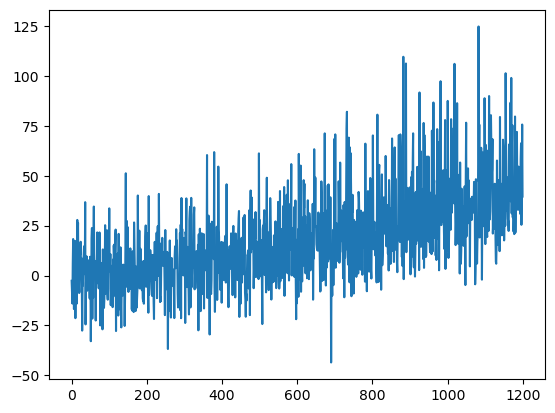

In [42]:
plt.plot(total_rewards)

__Analyzing the last Episode__

In [43]:
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
7734,0,1,8,8,0,-2.328396,1
7735,5,1,6,7,0,0.000000,1
7736,9,1,5,8,8,0.813723,1
7737,8,2,5,8,9,0.465631,0
7738,5,2,5,8,5,0.000000,0
...,...,...,...,...,...,...,...
7979,6,8,5,10,7,0.122070,2
7980,3,8,5,9,0,-0.365973,1
7981,8,8,5,10,4,0.610113,0
7982,9,8,6,10,10,0.733137,2


In [44]:
data.position = data.position.map({0: -1, 1:0, 2:1})
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
7734,0,1,8,8,0,-2.328396,0
7735,5,1,6,7,0,0.000000,0
7736,9,1,5,8,8,0.813723,0
7737,8,2,5,8,9,0.465631,-1
7738,5,2,5,8,5,0.000000,-1
...,...,...,...,...,...,...,...
7979,6,8,5,10,7,0.122070,1
7980,3,8,5,9,0,-0.365973,0
7981,8,8,5,10,4,0.610113,-1
7982,9,8,6,10,10,0.733137,1


In [45]:
(data.position * data.Profit).sum()

39.587140083315205

In [46]:
data.position.value_counts()

position
 1    91
-1    82
 0    77
Name: count, dtype: int64

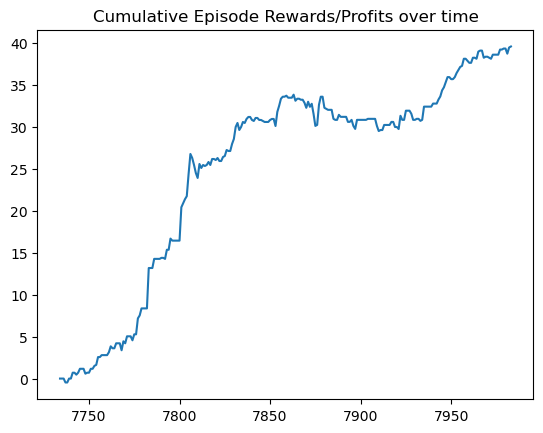

In [47]:
(data.position * data.Profit).cumsum().plot()
plt.title("Cumulative Episode Rewards/Profits over time")
plt.show()

__Potential Pitfalls:__
- Overfitting (how well can the Agent generalize to new Data?)
- What about trading costs? 

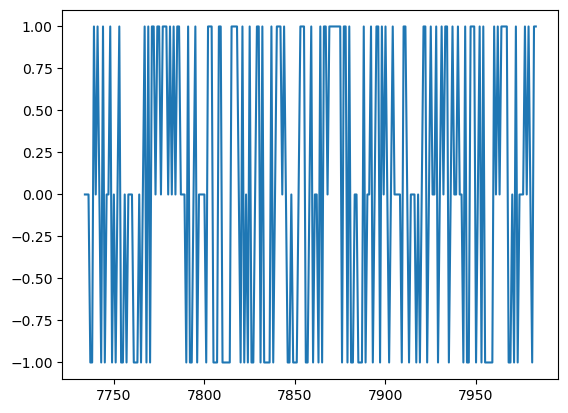

In [48]:
data.position.plot()
plt.show()

In [49]:
data.position.diff().abs().sum()

221.0

-> Excessive Trading. Trading Costs will be high.

### Testing the trained RL Agent

In [425]:
test_df = pd.read_csv("test_df4.csv")
test_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
0,2,2,2,1,2,0.229001
1,2,2,2,1,3,0.343800
2,2,2,2,2,3,0.458598
3,1,2,2,2,2,0.000000
4,1,2,2,3,1,-0.114679
...,...,...,...,...,...,...
1613,1,1,1,0,1,-0.351548
1614,2,1,1,0,1,0.117183
1615,1,1,1,0,1,-0.234365
1616,2,1,1,0,3,0.234365


In [426]:
total_timestamps_test = len(test_df)
total_timestamps_test

1618

In [427]:
q_table.shape

(11, 11, 11, 11, 11, 3, 3)

In [53]:
# Number of testing episodes to run
num_test_episodes = 1000 
max_steps_test = 250

In [54]:
# Testing phase
test_rewards = []
test_success_count = 0
seed = 100
np.random.seed(seed)

for episode in range(num_test_episodes):
    
    # Select a random start
    start_index = np.random.randint(0, total_timestamps_test - max_steps_test + 1)
 
    # Select the sequence of 250 timestamps
    test_data = test_df.iloc[start_index:start_index + max_steps_test].copy()
    
    test_data['position'] = 1 # initialize positions (neutral)

    row = test_data.iloc[0] # first step (bar) in episode

    state = get_state(row) # state: starting with a neutral position and current indicators

    total_reward = 0

    for step in range(max_steps_test - 1):
        action = np.argmax(q_table[state])

        # Determine the next position based on the action taken
        next_position = action  # The action directly translates to the new position

        # Update the position for the next row
        test_data.at[test_data.index[step + 1], 'position'] = next_position

        # Get next row
        next_row = test_data.iloc[step + 1]

        # Calculate the reward based on the current position and the row's reward
        reward = calculate_reward(next_row['position'], next_row['Profit'])

        # Determine the next state (after taking the action) 
        next_state = get_state(next_row)

        # Update the total reward and state
        total_reward += reward
        state = next_state
    
    # Record performance metrics
    test_rewards.append(total_reward)
    
    # Check if the episode is successful based on the episode rewards (greater than 200)
    if total_reward > 0:
        episode_success = True
    else:
        episode_success = False
    
    test_success_count += episode_success
    
    # Print the total reward for every 100th episode and whether it was a success
    if (episode + 1) % 100 == 0:
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if episode_success else False}')
        
# Calculate performance metrics
average_total_reward = np.mean(test_rewards)
success_rate = (test_success_count / num_test_episodes) * 100
min_reward = np.min(test_rewards)
max_reward = np.max(test_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({test_success_count}/{num_test_episodes})')

Episode 100: Total reward: 16, Success: True
Episode 200: Total reward: -4, Success: False
Episode 300: Total reward: 11, Success: True
Episode 400: Total reward: 16, Success: True
Episode 500: Total reward: 0, Success: True
Episode 600: Total reward: -3, Success: False
Episode 700: Total reward: 3, Success: True
Episode 800: Total reward: 8, Success: True
Episode 900: Total reward: 25, Success: True
Episode 1000: Total reward: 13, Success: True

Performance Metrics:
Average Total Reward: 7.88
Minimum Reward: -12
Maximum Reward: 36
Success Rate: 68.30% (683/1000)


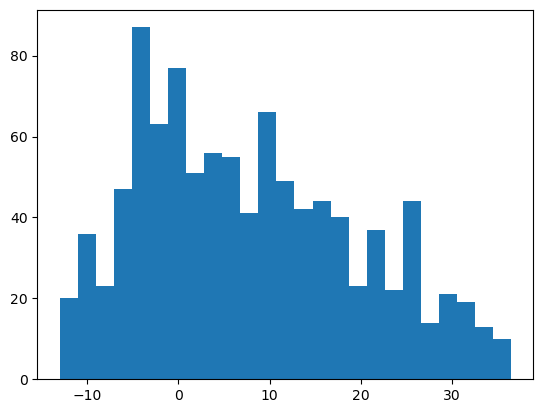

In [61]:
plt.hist(test_rewards, bins = 25)
plt.show()

__Analyzing last Episode__

In [62]:
test_data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
1170,5,7,6,9,6,0.000000,0
1171,4,7,5,8,1,-0.115514,0
1172,2,7,4,9,0,-0.461698,1
1173,9,7,5,9,10,1.039386,-1
1174,9,7,6,9,10,1.157165,-1
...,...,...,...,...,...,...,...
1415,0,8,9,10,0,-1.316547,-1
1416,8,8,9,10,3,0.478387,1
1417,9,8,9,10,9,0.718355,-1
1418,2,8,9,9,3,-0.478983,-1


In [63]:
test_data.position = test_data.position.map({0: -1, 1:0, 2:1})
test_data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
1170,5,7,6,9,6,0.000000,-1.0
1171,4,7,5,8,1,-0.115514,-1.0
1172,2,7,4,9,0,-0.461698,0.0
1173,9,7,5,9,10,1.039386,NaN
1174,9,7,6,9,10,1.157165,NaN
...,...,...,...,...,...,...,...
1415,0,8,9,10,0,-1.316547,NaN
1416,8,8,9,10,3,0.478387,0.0
1417,9,8,9,10,9,0.718355,NaN
1418,2,8,9,9,3,-0.478983,NaN


In [64]:
(test_data.position * test_data.Profit).sum()

-0.8164644241326346

In [65]:
test_data.position.value_counts()

position
-1.0    84
 0.0    79
Name: count, dtype: int64

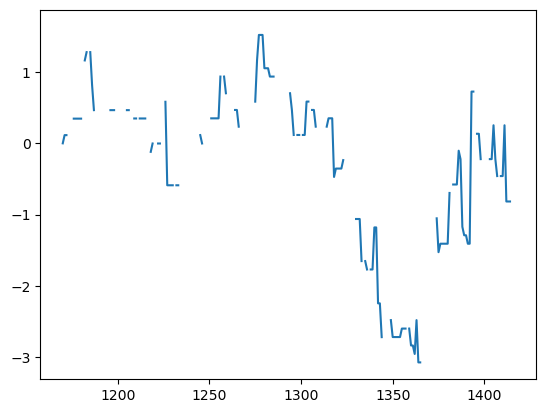

In [66]:
(test_data.position * test_data.Profit).cumsum().plot()
plt.show()

### The Effects of Trading Costs

Idea: Each Trade triggers costs.
- __Direkt Costs__: Trading Commissions (e.g. 1 USD per trade or x% on trading volume)
- __Indirect Costs__: Spread Costs -> Buy Price(Ask) is higher than Sell Price (Bid) 

__Simple Assumption__: Single Trade costs 0.5 USD and Double Trade costs 1 USD per 1000 contracts (approx. 0.05% to 0.1% proportional trading costs)

(Costs structure depends on Exchange/Broker and Instrument.)

In [67]:
data # last training episode (out of 1200)

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
7734,0,1,8,8,0,-2.328396,0
7735,5,1,6,7,0,0.000000,0
7736,9,1,5,8,8,0.813723,0
7737,8,2,5,8,9,0.465631,-1
7738,5,2,5,8,5,0.000000,-1
...,...,...,...,...,...,...,...
7979,6,8,5,10,7,0.122070,1
7980,3,8,5,9,0,-0.365973,0
7981,8,8,5,10,4,0.610113,-1
7982,9,8,6,10,10,0.733137,1


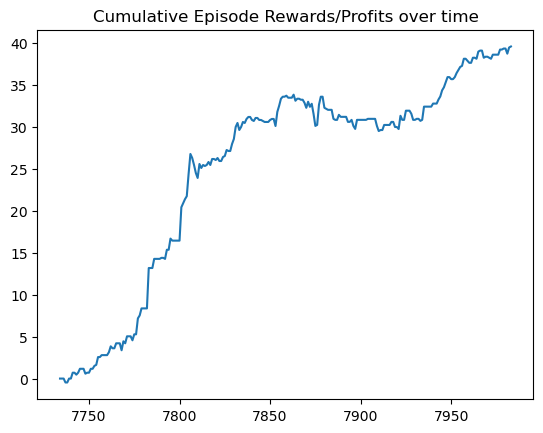

In [68]:
(data.position * data.Profit).cumsum().plot()
plt.title("Cumulative Episode Rewards/Profits over time")
plt.show()

In [69]:
data["trades"] = data.position.diff().abs()
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position,trades
7734,0,1,8,8,0,-2.328396,0,NaN
7735,5,1,6,7,0,0.000000,0,0.0
7736,9,1,5,8,8,0.813723,0,0.0
7737,8,2,5,8,9,0.465631,-1,1.0
7738,5,2,5,8,5,0.000000,-1,0.0
...,...,...,...,...,...,...,...,...
7979,6,8,5,10,7,0.122070,1,1.0
7980,3,8,5,9,0,-0.365973,0,1.0
7981,8,8,5,10,4,0.610113,-1,1.0
7982,9,8,6,10,10,0.733137,1,2.0


In [70]:
data.trades.sum()

221.0

In [71]:
costs_of_trade = 0.5

In [72]:
(data.position * data.Profit).sum() - data.trades.sum() * costs_of_trade

-70.9128599166848

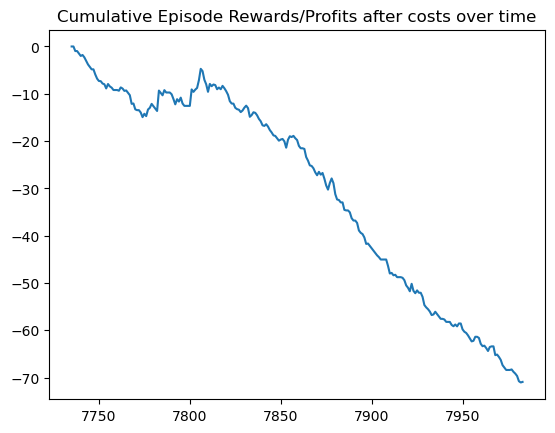

In [73]:
((data.position * data.Profit).cumsum() - (data.trades.cumsum() * costs_of_trade)).plot()
plt.title("Cumulative Episode Rewards/Profits after costs over time")
plt.show()

-> Trading Costs do matter! Excessive Trading rarely works.

### Adding Trading Costs / Penalizing excessive Trading

In [428]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [429]:
train_df = pd.read_csv("train_df4.csv")
train_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
0,3,3,2,3,3,1.136184
1,3,3,3,3,1,1.345992
2,1,3,3,3,0,-0.207305
3,0,3,0,0,0,-14.002919
4,0,3,0,0,0,-0.503778
...,...,...,...,...,...,...
9994,2,2,1,1,3,0.457644
9995,1,2,1,1,2,-0.228882
9996,3,2,1,1,3,0.686884
9997,1,2,1,1,2,-0.114560


In [430]:
total_timestamps = len(train_df)

In [431]:
# Function to get the current state for a row
def get_state(row):
    return (int(row['returns_binned']),
            int(row['SMA_ratio_binned']),
            int(row['MACD_hist_binned']),
            int(row['RSI_binned']),
            int(row['SO_diff_binned']),
            int(row['position']))

- For RL Agent Training, we can penalize trades beyond their costs and/or incentivize costs-saving behavior (Rewards != Profits)

In [453]:
costs_of_trade = 0.5 # per single trade
add_penal = 1 # additional penalization for trades
add_incent = 0.2 # incentive for taking a neutral position (take highly promosing positions only)

In [454]:
# Define the reward function based on position, Profit and trades
def calculate_reward(position, Profit, state):
    current_pos = state[-1]
    trades = abs(position - current_pos) # single or double trade?
    trading_costs = trades * (costs_of_trade + add_penal)
    
    if position == 2: # Long
        reward = (Profit - trading_costs) # Reward as is (positive for positive returns)
        return reward
    elif position == 0:# Short
        reward = (-Profit - trading_costs) # Inverse the reward (positive for negative returns)
        return reward
    else:  # Neutral
        return (0 - trading_costs + add_incent)  # No reward (could be modified based on strategy)

In [455]:
# Initialize performance metrics
total_rewards = []
success_count = 0

# Set random seeds for reproducibility
seed = 100
np.random.seed(seed)

num_episodes = 3500 # more complexitiy -> more episodes
max_steps = 250  

# Parameters for Q-learning
alpha = 0.05  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 1.0  # Starting exploration rate
epsilon_min = 0.01  # Minimum exploration rate
epsilon_decay = 0.9995  # Decay rate for epsilon

num_bins = (4, 4, 4, 4, 4, 3, 3) # incl. Action Space 

# Initialize the Q-table with dimensions (5, 5, 5, 5, 5, 3, 3)
q_table = np.random.uniform(low = -1, high = 1, size = num_bins)

for episode in range(num_episodes):
    
    # Select a random episode start
    start_index = np.random.randint(0, total_timestamps - max_steps + 1)
 
    # Select the sequence of max_steps timestamps
    data = train_df.iloc[start_index:start_index + max_steps].copy()
    
    data['position'] = 1 # initialize positions (neutral)

    row = data.iloc[0] # first step (bar) in episode

    state = get_state(row) # state: starting with a neutral position and current indicators

    total_reward = 0

    for step in range(max_steps - 1):
        # Epsilon-greedy action selection
        if np.random.rand() < epsilon:
            action = np.random.choice(3)
        else:
            action = np.argmax(q_table[state])

        # Determine the next position based on the action taken
        next_position = action  # The action directly translates to the new position

        # Update the position for the next row
        data.at[data.index[step + 1], 'position'] = next_position

        # Get next row
        next_row = data.iloc[step + 1]

        # Calculate the reward based on the current position and the row's reward
        reward = calculate_reward(next_row['position'], next_row['Profit'], state) #adding state

        # Determine the next state (after taking the action) 
        next_state = get_state(next_row)

        # Update Q-value
        best_next_action = np.argmax(q_table[next_state])
        td_target = reward + gamma * q_table[next_state][best_next_action]
        q_table[state][action] += alpha * (td_target - q_table[state][action])

        # Update the total reward and state
        total_reward += reward
        state = next_state
    
    # Record performance metrics
    total_rewards.append(total_reward)
    
    # Check if the episode is successful based on the episode rewards (greater than 200)
    if total_reward > 0:
        episode_success = True
    else:
        episode_success = False
    
    success_count += episode_success
    
    # Decay epsilon after each episode
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay
    
    # Print the total reward for every 100th episode and whether it was a success
    if (episode + 1) % 100 == 0:
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if episode_success else False}, Epsilon: {round(epsilon, 2)}')
        
# Calculate performance metrics
average_total_reward = np.mean(total_rewards)
success_rate = (success_count / num_episodes) * 100
min_reward = np.min(total_rewards)
max_reward = np.max(total_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({success_count}/{num_episodes})')

Episode 100: Total reward: -328, Success: False, Epsilon: 0.95
Episode 200: Total reward: -267, Success: False, Epsilon: 0.9
Episode 300: Total reward: -322, Success: False, Epsilon: 0.86
Episode 400: Total reward: -297, Success: False, Epsilon: 0.82
Episode 500: Total reward: -203, Success: False, Epsilon: 0.78
Episode 600: Total reward: -269, Success: False, Epsilon: 0.74
Episode 700: Total reward: -179, Success: False, Epsilon: 0.7
Episode 800: Total reward: -202, Success: False, Epsilon: 0.67
Episode 900: Total reward: -202, Success: False, Epsilon: 0.64
Episode 1000: Total reward: -184, Success: False, Epsilon: 0.61
Episode 1100: Total reward: -171, Success: False, Epsilon: 0.58
Episode 1200: Total reward: -164, Success: False, Epsilon: 0.55
Episode 1300: Total reward: -160, Success: False, Epsilon: 0.52
Episode 1400: Total reward: -184, Success: False, Epsilon: 0.5
Episode 1500: Total reward: -127, Success: False, Epsilon: 0.47
Episode 1600: Total reward: -140, Success: False, Ep

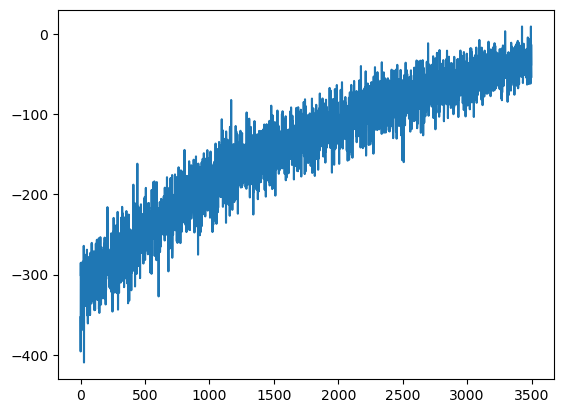

In [456]:
plt.plot(total_rewards)
plt.show()

In [457]:
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
3564,0,1,3,1,0,-1.067758,1
3565,3,1,3,2,1,1.186490,1
3566,3,1,3,3,3,1.188874,1
3567,3,1,3,3,2,0.953078,1
3568,3,1,3,3,2,0.835299,1
...,...,...,...,...,...,...,...
3809,0,2,0,0,1,-1.697302,2
3810,0,2,0,0,1,-2.174616,1
3811,0,2,0,0,1,-0.602484,1
3812,1,2,0,0,2,-0.361204,1


In [458]:
data.position = data.position.map({0: -1, 1:0, 2:1})
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
3564,0,1,3,1,0,-1.067758,0
3565,3,1,3,2,1,1.186490,0
3566,3,1,3,3,3,1.188874,0
3567,3,1,3,3,2,0.953078,0
3568,3,1,3,3,2,0.835299,0
...,...,...,...,...,...,...,...
3809,0,2,0,0,1,-1.697302,1
3810,0,2,0,0,1,-2.174616,0
3811,0,2,0,0,1,-0.602484,0
3812,1,2,0,0,2,-0.361204,0


In [459]:
data.position.value_counts()

position
 0    181
 1     48
-1     21
Name: count, dtype: int64

In [460]:
data["trades"] = data.position.diff().abs()
data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position,trades
3564,0,1,3,1,0,-1.067758,0,NaN
3565,3,1,3,2,1,1.186490,0,0.0
3566,3,1,3,3,3,1.188874,0,0.0
3567,3,1,3,3,2,0.953078,0,0.0
3568,3,1,3,3,2,0.835299,0,0.0
...,...,...,...,...,...,...,...,...
3809,0,2,0,0,1,-1.697302,1,0.0
3810,0,2,0,0,1,-2.174616,0,1.0
3811,0,2,0,0,1,-0.602484,0,0.0
3812,1,2,0,0,2,-0.361204,0,0.0


In [461]:
data.trades.sum()

54.0

In [462]:
(data.position * data.Profit).sum() - data.trades.sum() * costs_of_trade

-35.21304321288974

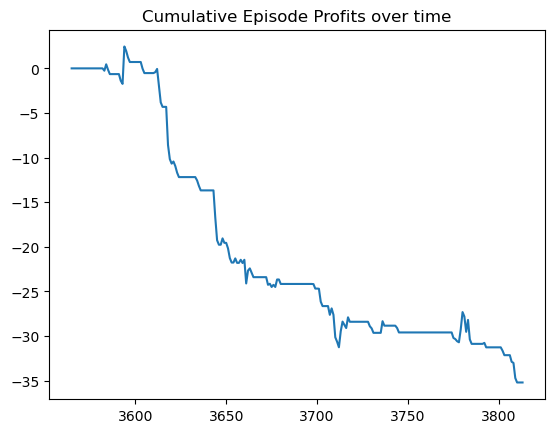

In [463]:
((data.position * data.Profit).cumsum() - (data.trades.cumsum() * costs_of_trade)).plot()
plt.title("Cumulative Episode Profits over time")
plt.show()

__Testing on the Testset__

In [464]:
test_df = pd.read_csv("test_df4.csv")
test_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
0,2,2,2,1,2,0.229001
1,2,2,2,1,3,0.343800
2,2,2,2,2,3,0.458598
3,1,2,2,2,2,0.000000
4,1,2,2,3,1,-0.114679
...,...,...,...,...,...,...
1613,1,1,1,0,1,-0.351548
1614,2,1,1,0,1,0.117183
1615,1,1,1,0,1,-0.234365
1616,2,1,1,0,3,0.234365


In [465]:
total_timestamps_test = len(test_df)
total_timestamps_test

1618

In [466]:
# Number of testing episodes to run
num_test_episodes = 1000 
max_steps_test = 250

# Testing phase
test_rewards = []
test_success_count = 0
seed = 100
np.random.seed(seed)

for episode in range(num_test_episodes):
    
    # Select a random start
    start_index = np.random.randint(0, total_timestamps_test - max_steps_test + 1)
 
    # Select the sequence of 250 timestamps
    test_data = test_df.iloc[start_index:start_index + max_steps_test].copy()
    
    test_data['position'] = 1 # initialize positions (neutral)

    row = test_data.iloc[0] # first step (bar) in episode

    state = get_state(row) # state: starting with a neutral position and current indicators

    total_reward = 0

    for step in range(max_steps_test - 1):
        action = np.argmax(q_table[state])

        # Determine the next position based on the action taken
        next_position = action  # The action directly translates to the new position

        # Update the position for the next row
        test_data.at[test_data.index[step + 1], 'position'] = next_position

        # Get next row
        next_row = test_data.iloc[step + 1]

        # Calculate the reward based on the current position and the row's reward
        reward = calculate_reward(next_row['position'], next_row['Profit'], state)

        # Determine the next state (after taking the action) 
        next_state = get_state(next_row)

        # Update the total reward and state
        total_reward += reward
        state = next_state
    
    # Record performance metrics
    test_rewards.append(total_reward)
    
    # Check if the episode is successful based on the episode rewards (greater than 200)
    if total_reward > 0:
        episode_success = True
    else:
        episode_success = False
    
    test_success_count += episode_success
    
    # Print the total reward for every 100th episode and whether it was a success
    if (episode + 1) % 100 == 0:
        print(f'Episode {episode + 1}: Total reward: {int(total_reward)}, Success: {True if episode_success else False}')
        
# Calculate performance metrics
average_total_reward = np.mean(test_rewards)
success_rate = (test_success_count / num_test_episodes) * 100
min_reward = np.min(test_rewards)
max_reward = np.max(test_rewards)

# Print performance metrics
print(f'\nPerformance Metrics:')
print(f'Average Total Reward: {average_total_reward:.2f}')
print(f'Minimum Reward: {int(min_reward)}')
print(f'Maximum Reward: {int(max_reward)}')
print(f'Success Rate: {success_rate:.2f}% ({test_success_count}/{num_test_episodes})')

Episode 100: Total reward: 26, Success: True
Episode 200: Total reward: 40, Success: True
Episode 300: Total reward: 40, Success: True
Episode 400: Total reward: 26, Success: True
Episode 500: Total reward: 45, Success: True
Episode 600: Total reward: 44, Success: True
Episode 700: Total reward: 49, Success: True
Episode 800: Total reward: 40, Success: True
Episode 900: Total reward: 44, Success: True
Episode 1000: Total reward: 40, Success: True

Performance Metrics:
Average Total Reward: 42.37
Minimum Reward: 26
Maximum Reward: 49
Success Rate: 100.00% (1000/1000)


In [467]:
test_data.position = test_data.position.map({0: -1, 1:0, 2:1})
test_data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position
1170,1,2,2,3,2,0.000000,0
1171,1,2,2,3,0,-0.115514,0
1172,1,2,1,3,0,-0.461698,0
1173,3,2,1,3,3,1.039386,0
1174,3,2,2,3,3,1.157165,0
...,...,...,...,...,...,...,...
1415,0,3,3,3,0,-1.316547,0
1416,3,3,3,3,1,0.478387,0
1417,3,3,3,3,3,0.718355,0
1418,0,3,3,3,1,-0.478983,0


In [468]:
test_data["trades"] = test_data.position.diff().abs()
test_data

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit,position,trades
1170,1,2,2,3,2,0.000000,0,NaN
1171,1,2,2,3,0,-0.115514,0,0.0
1172,1,2,1,3,0,-0.461698,0,0.0
1173,3,2,1,3,3,1.039386,0,0.0
1174,3,2,2,3,3,1.157165,0,0.0
...,...,...,...,...,...,...,...,...
1415,0,3,3,3,0,-1.316547,0,0.0
1416,3,3,3,3,1,0.478387,0,0.0
1417,3,3,3,3,3,0.718355,0,0.0
1418,0,3,3,3,1,-0.478983,0,0.0


In [469]:
test_data.trades.sum()

6.0

In [470]:
(test_data.position * test_data.Profit).sum() - test_data.trades.sum() * costs_of_trade

-1.4573125839233398

In [471]:
test_data.position.value_counts()

position
 0    240
-1     10
Name: count, dtype: int64

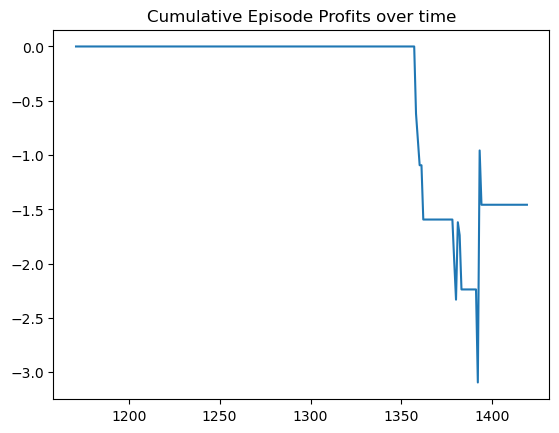

In [472]:
((test_data.position * test_data.Profit).cumsum() - (test_data.trades.cumsum() * costs_of_trade)).plot()
plt.title("Cumulative Episode Profits over time")
plt.show()

-> No significant reduction of trading activity! 

Potential Reasons: Overfitting and too complex model (too granular, too many state-action pairs)

-> State-Action Pairs in the Training Set with effective trade penalization/incentives are not present in the Test Set

In [98]:
q_table.flatten().shape

(1449459,)

In [99]:
test_df

,returns_binned,SMA_ratio_binned,MACD_hist_binned,RSI_binned,SO_diff_binned,Profit
0,6,7,5,4,7,0.229001
1,7,7,6,4,9,0.343800
2,8,7,6,6,9,0.458598
3,5,7,6,8,5,0.000000
4,4,7,6,9,3,-0.114679
...,...,...,...,...,...,...
1613,3,3,3,1,4,-0.351548
1614,6,3,3,1,5,0.117183
1615,3,3,4,0,5,-0.234365
1616,7,3,5,0,9,0.234365


-> 1,400,000  state-action pairs vs. 1,600 bars in the test set.